In [1]:
from input import read_input
from math import sqrt, floor
import numpy as np
import matplotlib.pyplot as plt

In [85]:
ingredients, area, pizza = read_input('big.in')
pizza

array([[ True, False, False, ..., False,  True,  True],
       [False,  True,  True, ...,  True, False, False],
       [False,  True, False, ...,  True, False, False],
       ..., 
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [86]:
def find_all_sizes(max_area):
    sizes = []
    def exist_better(x, y):
        for _x, _y in sizes:
            if _x >= x and _y >= y:
                return True
        return False
    
    for x in range(1, max_area * 2 + 1)[::-1]:
        for y in range(1, max_area * 2 + 1)[::-1]:
            if x * y <= max_area:
                if not exist_better(x, y):
                    sizes.append((x, y))
                    
    return sizes

In [87]:
find_all_sizes(14)

[(14, 1), (7, 2), (4, 3), (3, 4), (2, 7), (1, 14)]

In [88]:
def get_slice(pizza, x, y, x_size, y_size):
    return pizza[x : x + x_size, y: y + y_size]

In [89]:
def slice_is_ok(pizza_slice, min_ingredients):
    if np.sum(pizza_slice) < min_ingredients:
        return False
    if np.sum(np.ones(pizza_slice.shape) - pizza_slice) < min_ingredients:
        return False
    return True

In [90]:
def run_algo(ingredients, area, pizza, x_max, y_max):    
    print(pizza.shape)
    taken_matrix = np.zeros(pizza.shape)
    taken = []
    # First fill
    for x in range(0, pizza.shape[0], x_max):
        for y in range(0, pizza.shape[1], y_max):
#            print(x, y)
            pizza_slice = get_slice(pizza, x, y, x_max, y_max)
    #        print(pizza_slice, slice_is_ok(pizza_slice, ingredients))

            if slice_is_ok(pizza_slice, ingredients):
#                print('slice ok:', x, y)
                taken_matrix[x : x + x_max, y: y + y_max] = np.ones(pizza_slice.shape)
    #            print('TAKEN', taken_matrix)
                taken.append((x, x + x_max, y, y + y_max))

    # print(taken)
    return taken, taken_matrix

(1000, 1000)
572166.0


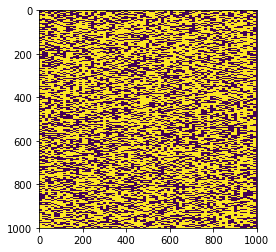

(1000, 1000)
574500.0


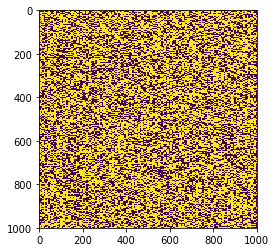

(1000, 1000)
225432.0


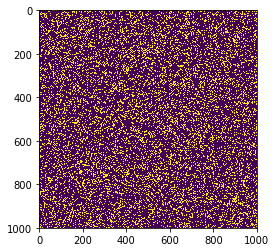

(1000, 1000)
225264.0


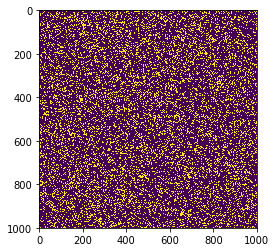

(1000, 1000)
573330.0


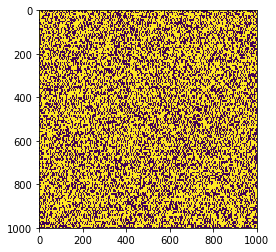

(1000, 1000)
573678.0


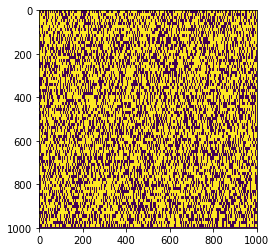

In [91]:
for x_max, y_max in find_all_sizes(area):
    taken, taken_matrix = run_algo(ingredients, area, pizza, x_max, y_max)
    print(np.sum(taken_matrix))
    plt.imshow(np.transpose(taken_matrix))
    plt.show()